**Problem Statement :**

Spam is potentially dangerous. A big reason that it is so important for spam to be filtered is because it can contain malicious content that can spread viruses and cyber attacks. One email can very easily take down a large corporation, so businesses need the best security they can get.


my project idea is to classify the text messages into spam or not spam This would save time for the user by not worrying about spam or advertisements and be notified for an important message


###  About the dataset : .

we have two comma Seprated file which represent about label of spam or ham and anaother atribute is Text .

## Our Strategy to Spam Detection  Model

A normal  classification algorithems can be used for dectecting spam/hamm.

So we'll convert the target variable into it's vector form and then predict the label.

### importing the required libraries

In [58]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## getting the data 

In [59]:
data = pd.read_csv('/content/SMSSpamCollection.csv', encoding = "ISO-8859-1", engine='python',header=None)

In [60]:
Second_DataSet = pd.read_csv('/content/SMSSpamCollection.csv', encoding = "ISO-8859-1", engine='python', header=None)

Exploratory Data Analysis

In [61]:
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
data.shape

(5574, 2)

In [63]:
data[0].value_counts()

ham     4827
spam     747
Name: 0, dtype: int64

In [64]:
data.isna().sum()

0    0
1    0
dtype: int64

In [65]:
Second_DataSet.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
Second_DataSet.shape

(5574, 2)

Merging both the datasets

In [67]:
Total_DataSet = data + Second_DataSet

In [68]:
Total_DataSet.shape

(5574, 2)

Inspecting the data types, null values and No. of levels

In [69]:
def inspect_data(data) :
      return pd.DataFrame({"Data type": data.dtypes,"NUll Values": data.isnull().sum(),
                           "No of Levels": data.apply(lambda x: str(x.nunique()),axis=0),
                          "Levels": data.apply(lambda x: str(x.unique()),axis=0)})

In [70]:
inspect_data(Total_DataSet)

,Data type,NUll Values,No of Levels,Levels
0,object,0,2,['hamham' 'spamspam']
1,object,0,5171,"['Go until jurong point, crazy.. Available onl..."


Data Preprocessing :



In [71]:
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [72]:
Total_DataSet['clean_plot'] = Total_DataSet[1].apply(lambda x: clean_text(x))

In [73]:
Total_DataSet.head()

,0,1,clean_plot
0,hamham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,hamham,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni
2,spamspam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,hamham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say u ...
4,hamham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


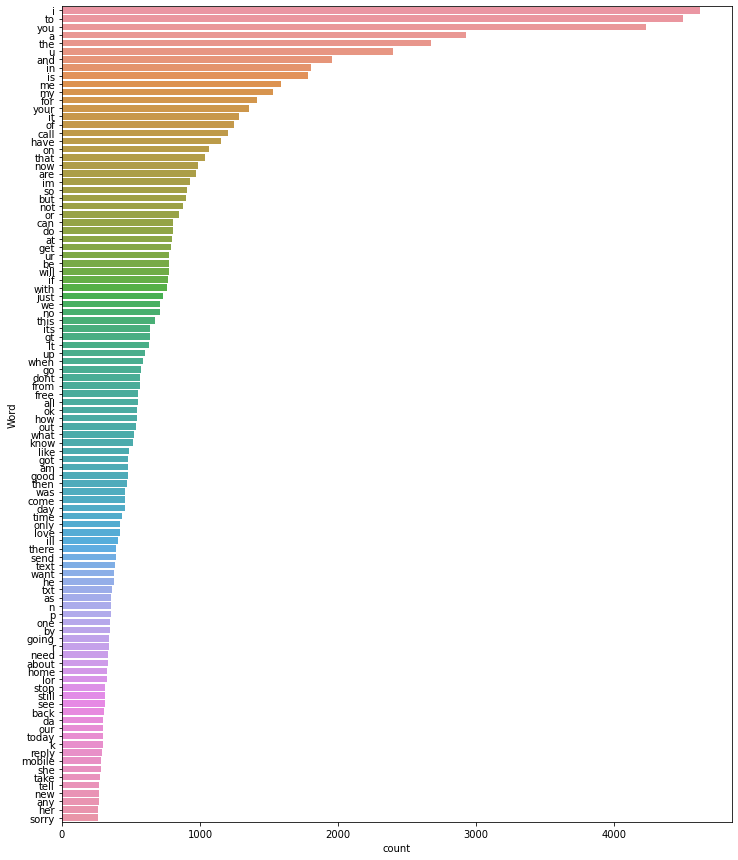

In [74]:
import nltk
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(Total_DataSet['clean_plot'], 100)

Visuals before removing stopwords 

Importing Stopwords

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

Total_DataSet['clean_plot'] = Total_DataSet['clean_plot'].apply(lambda x: remove_stopwords(x))

Visuals After Removing Stopwords

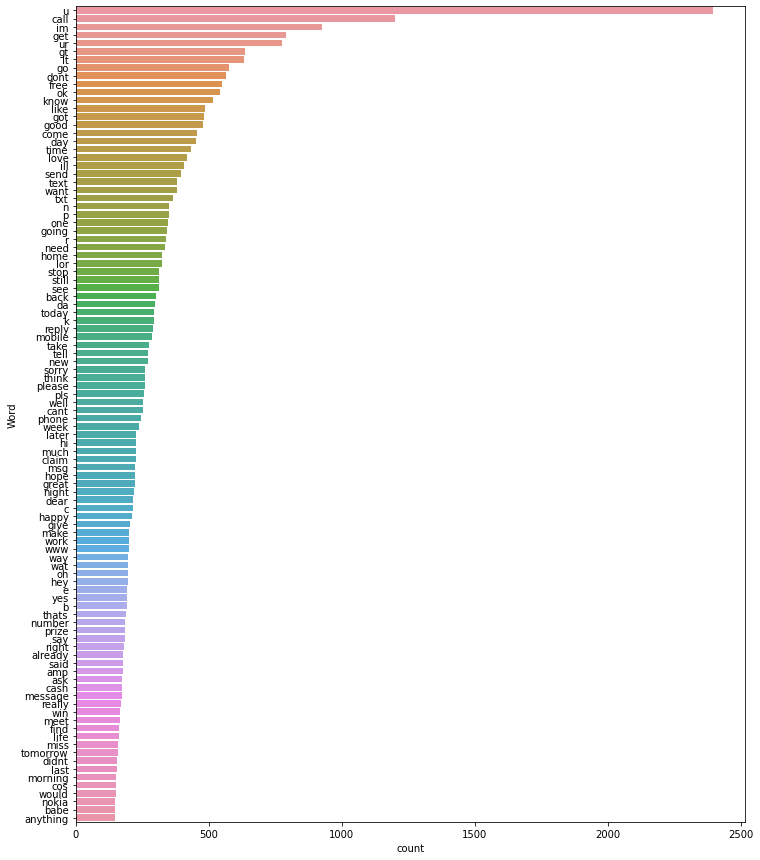

In [77]:
freq_words(Total_DataSet['clean_plot'], 100)

In [78]:
Total_DataSet['length']=Total_DataSet['clean_plot'].apply(len)
Total_DataSet.head()

,0,1,clean_plot,length
0,hamham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,165
1,hamham,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni,47
2,spamspam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,206
3,hamham,U dun say so early hor... U c already then say...,u dun say early hor u c already say u dun say ...,71
4,hamham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnah...,86


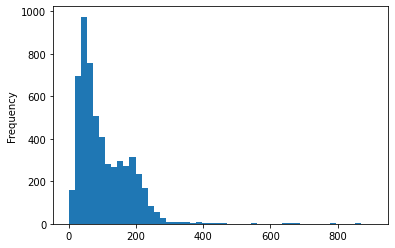

In [79]:
Total_DataSet['length'].plot(bins=50,kind='hist')

In [80]:
Total_DataSet.head()

,0,1,clean_plot,length
0,hamham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,165
1,hamham,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni,47
2,spamspam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,206
3,hamham,U dun say so early hor... U c already then say...,u dun say early hor u c already say u dun say ...,71
4,hamham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnah...,86


Applying tfidf_vectorizer

In [81]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
DataSet = Total_DataSet.copy()

In [82]:
DataSet.head()

,0,1,clean_plot,length
0,hamham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,165
1,hamham,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni,47
2,spamspam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,206
3,hamham,U dun say so early hor... U c already then say...,u dun say early hor u c already say u dun say ...,71
4,hamham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnah...,86


In [83]:
DataSet.head()

,0,1,clean_plot,length
0,hamham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,165
1,hamham,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni,47
2,spamspam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,206
3,hamham,U dun say so early hor... U c already then say...,u dun say early hor u c already say u dun say ...,71
4,hamham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnah...,86


In [84]:
DataSet[0].value_counts()

hamham      4827
spamspam     747
Name: 0, dtype: int64

In [85]:
for i in range(DataSet.shape[0]):
  if DataSet[0][i] == 'hamham':
    DataSet[0][i] = 0
  else:
    DataSet[0][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [86]:
DataSet.head()

,0,1,clean_plot,length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,165
1,0,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni,47
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,206
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say u dun say ...,71
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnah...,86


In [87]:
DataSet.dtypes

0             object
1             object
clean_plot    object
length         int64
dtype: object

In [88]:
DataSet[0] = DataSet[0].astype('int')

In [89]:
DataSet.rename(columns = {0:'target'}, inplace = True)

In [90]:
DataSet.head()

,target,1,clean_plot,length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,165
1,0,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni,47
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,206
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say u dun say ...,71
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnah...,86


In [91]:
DataSet['clean_plot'] = DataSet['clean_plot'].astype('category')

In [92]:
DataSet.dtypes

target           int64
1               object
clean_plot    category
length           int64
dtype: object

Spliting the dataset 

In [93]:
X = DataSet['clean_plot']
y = DataSet['target']

In [94]:
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=9)

In [95]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [96]:
xtrain_tfidf.reshape(-1,1)

<36331932x1 sparse matrix of type '<class 'numpy.float64'>'
	with 38847 stored elements in COOrdinate format>

In [97]:

from sklearn.linear_model import LogisticRegression

# Binary Relevance
#from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

## Model Building 

1 Logistic Regression 

2 RandomForest Classifier 

3 Naive Bayes 

4 Xg Boost

# Logistic Regression 

In [98]:
lr = LogisticRegression()

In [99]:
lr.fit(xtrain_tfidf,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_true = ytrain
y_pred = lr.predict(xtrain_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3861
           1       0.99      0.78      0.87       598

    accuracy                           0.97      4459
   macro avg       0.98      0.89      0.93      4459
weighted avg       0.97      0.97      0.97      4459



In [101]:
y_true = yval
y_pred = lr.predict(xval_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.79      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [102]:
# evaluate performance
print("F1=",f1_score(y_pred, yval, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

F1= 0.9695067264573991
Precision= 0.9695067264573991
recall= 0.9695067264573991
Accuracy= 0.9695067264573991


In [103]:
from sklearn.metrics import confusion_matrix as cm
cm(y_true, y_pred)

array([[964,   2],
       [ 32, 117]])

# RandomForest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
clf = RandomForestClassifier()
clf.fit(xtrain_tfidf,ytrain)
y_true = ytrain
y_pred = clf.predict(xtrain_tfidf)

# Classification Report on Train and test

In [106]:
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3861
           1       1.00      1.00      1.00       598

    accuracy                           1.00      4459
   macro avg       1.00      1.00      1.00      4459
weighted avg       1.00      1.00      1.00      4459



In [107]:
y_true = yval
y_pred = clf.predict(xval_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [108]:
# evaluate performance
print("F1=",f1_score(y_pred, y_true, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

F1= 0.97847533632287
Precision= 0.97847533632287
recall= 0.97847533632287
Accuracy= 0.97847533632287


In [109]:
from sklearn.metrics import confusion_matrix as cm
cm(y_true, y_pred)

array([[965,   1],
       [ 23, 126]])

# Naive Bayes Classifier 

In [110]:
from sklearn.naive_bayes import GaussianNB 

In [111]:
classifier = GaussianNB()

In [112]:
classifier.fit(xtrain_tfidf.toarray(),ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [113]:
y_true = yval
y_pred = classifier.predict(xval_tfidf.toarray())

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)


In [115]:
# evaluate performance
print("F1=",f1_score(y_pred, y_true, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))

F1= 0.9022421524663677
Precision= 0.9022421524663677
recall= 0.9022421524663677
Accuracy= 0.9022421524663677


In [116]:
cm(y_true, y_pred)

array([[877,  89],
       [ 20, 129]])

# XG Boost Classifier

In [117]:
from xgboost.sklearn import XGBClassifier

In [118]:
xg = XGBClassifier()
xg.fit(xtrain_tfidf,ytrain)
y_true = ytrain
y_pred = xg.predict(xtrain_tfidf)

Model Evaluation

In [126]:
y_true = ytrain
y_pred = xg.predict(xtrain_tfidf)

from sklearn.metrics import classification_report
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3861
           1       0.97      0.83      0.90       598

    accuracy                           0.97      4459
   macro avg       0.97      0.91      0.94      4459
weighted avg       0.97      0.97      0.97      4459



In [127]:
y_true = yval
y_pred = xg.predict(xval_tfidf)
classificationReport = classification_report(y_true, y_pred)

print(classificationReport)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       966
           1       0.93      0.75      0.83       149

    accuracy                           0.96      1115
   macro avg       0.94      0.87      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [128]:
# Printing Confusion Matrix
cm(y_true, y_pred)

array([[957,   9],
       [ 37, 112]])

In [130]:
DataSet.head()

,target,1,clean_plot,length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,165
1,0,Ok lar... Joking wif u oni...Ok lar... Joking ...,ok lar joking wif u oni ok lar joking wif u oni,47
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,206
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say u dun say ...,71
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnah...,86
